In [1]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['default', 'science', 'no-latex'])

# 1. Shanghai Metro Network

In [2]:
def load_dataset(city):
    
    from codes.utils.load_data.load_data_metro import load_metro_station_list
    
    data_folder = Path.cwd().parent / city
    
    # Load metro station list
    path = data_folder / f'metro_network_{city}.xlsx'
    data = load_metro_station_list(path, time_status='current')
    # drop duplicates
    # data = data.drop_duplicates(subset=['line_name', 'name'])
    # Select date
    data = data[data['opening_date'] <= '2024-06-30']
    # assign station id
    data = data.assign(station_id = lambda x : range(x.shape[0]))
    
    return data
# =============================================================================

In [8]:
city = 'shanghai'

data = load_dataset(city)
print('\nShape of station list data:', data.shape,
      '\nShape of data after removing duplicates:', data.drop_duplicates(subset=['line_name', 'name']).shape,
      '\nNumber of NA values:', data.isna().sum().sum())


path = Path.cwd().parent / f'{city}/boundary/boundary_gcj02.shp'
boundary = gpd.read_file(path).query('admin_leve == "6"')

Loading data: 22it [00:02, 10.56it/s]


Shape of station list data: (517, 14) 
Shape of data after removing duplicates: (517, 14) 
Number of NA values: 0


(30.907245, 31.40812)

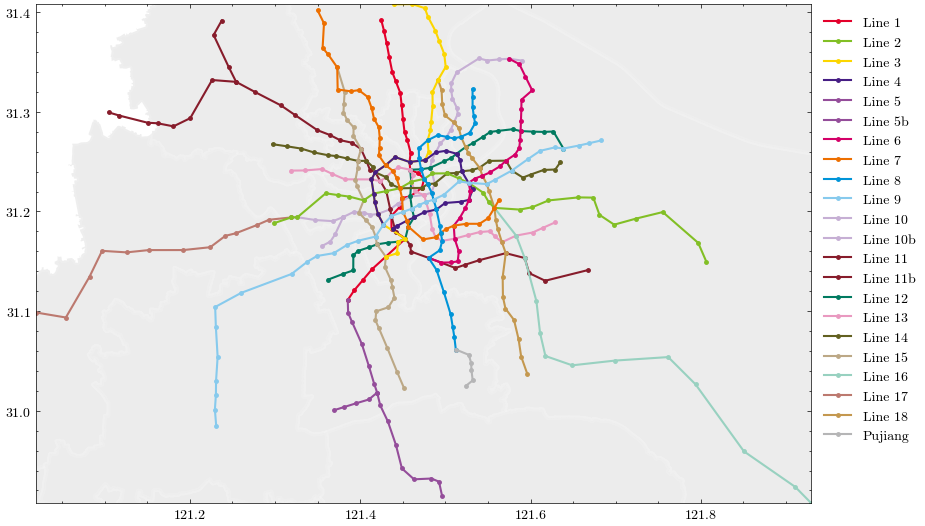

In [9]:
from codes.utils.plot.plot_metro_network import (
    plot_metro_network_integrate_from_dataframe,
    plot_metro_network_separate_from_dataframe)


fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.set_aspect('equal', 'box')

ax = boundary.plot(ax=ax, edgecolor='white', lw=3, facecolor='grey', alpha=0.15)

ax = plot_metro_network_integrate_from_dataframe(
    data, x_col='x_gcj02', y_col='y_gcj02',
    line_kwargs={'lw': 1.5, 'markersize': 5},
    ax=ax)

ax.set_xlim([data['x_gcj02'].min(), data['x_gcj02'].max()])
ax.set_ylim([data['y_gcj02'].min(), data['y_gcj02'].max()])

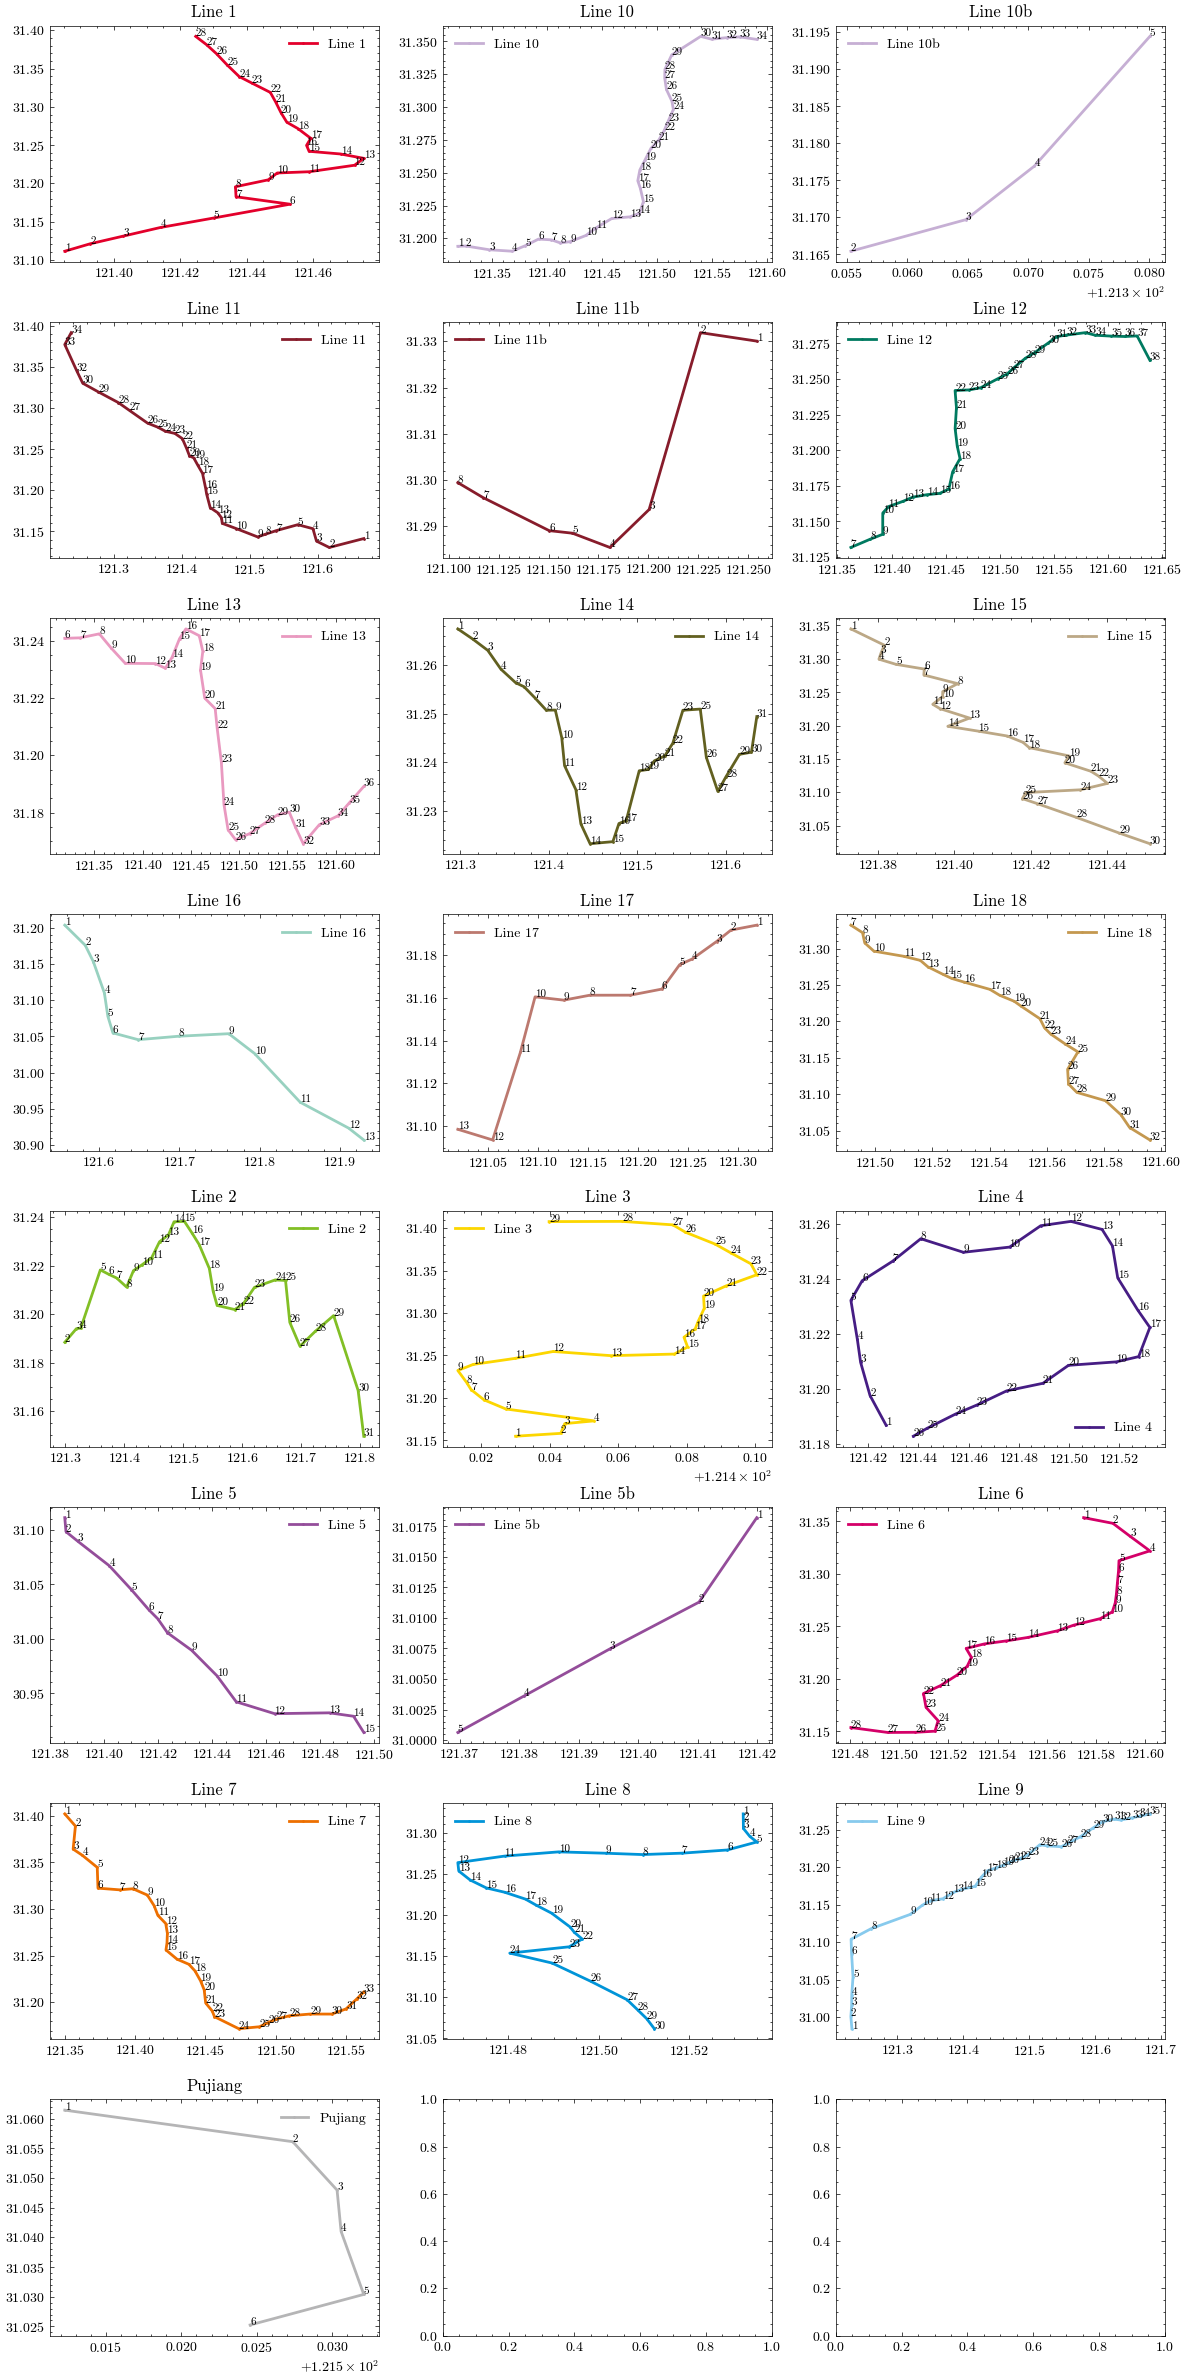

In [11]:
plot_metro_network_separate_from_dataframe(
    data, x_col='x_gcj02', y_col='y_gcj02',
    shared_axis=False, plot_background=False,
    line_kwargs={'lw': 2, 'markersize': 1})

# 2. Singapore Metro Network

#### (1) Load data

In [4]:
from codes.utils.load_data.load_data_metro import load_metro_station_list_v1, preprocess_metro_station

excel_path = r'C:\Users\Wei Zhou\Documents\zhouwei file\Github-Project\VeDa-Public-Transit-Network\Singapore\metro_network\station_line_list\station_list.xlsx'
# Load metro station data
data = load_metro_station_list_v1(excel_path)
# Preprocess metro station data
data = preprocess_metro_station(data, time_status='current') \
    .assign(line_cycle = lambda x : x['cycle'].map({'T' : True, 'F' : False}))

print('\nShape of data:', data.shape)

Loading data...: 14it [00:01,  9.79it/s]


Shape of data: (215, 24)



C:\Users\Wei Zhou\Documents\zhouwei file\Github-Project\VeDa-Public-Transit-Network\codes\utils\load_data\load_data_metro.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['closed_date'] = data['closed_date'].infer_objects(copy=True).fillna(pd.Timestamp.max)


#### (2) Plot network

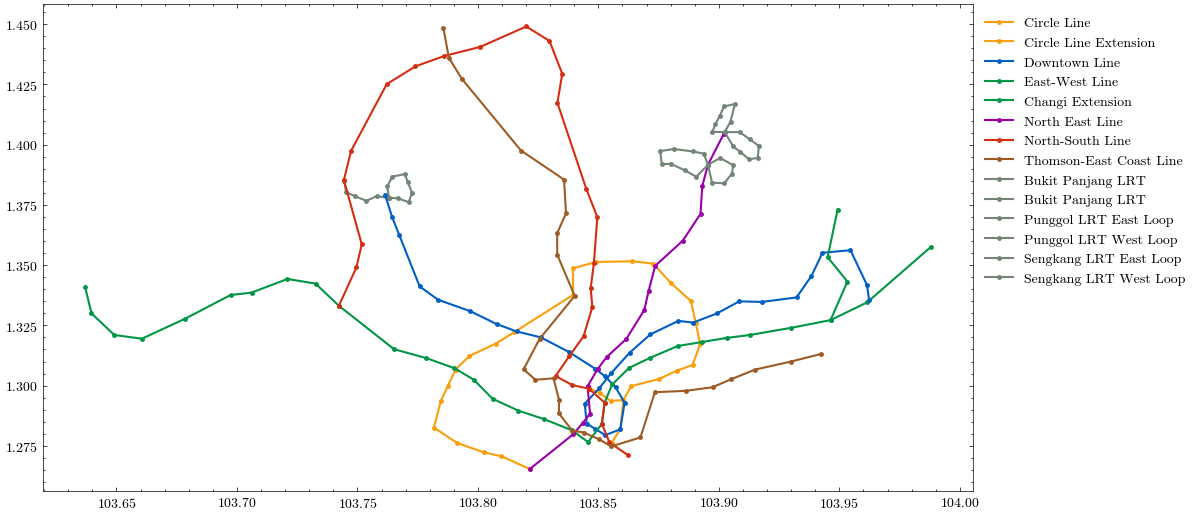

In [5]:
from codes.utils.plot.plot_metro_network import (
    plot_metro_network_integrate_from_dataframe,
    plot_metro_network_separate_from_dataframe)

legend_sorted = [
    'Circle Line', 'Circle Line Extension',
    'Downtown Line',
    'East-West Line', 'Changi Extension',
    'North East Line',
    'North-South Line',
    'Thomson-East Coast Line',
    'Bukit Panjang LRT', 'Bukit Panjang LRT',
    'Punggol LRT East Loop', 'Punggol LRT West Loop', 
    'Sengkang LRT East Loop', 'Sengkang LRT West Loop']

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.set_aspect('equal', 'box')

ax = plot_metro_network_integrate_from_dataframe(
    data, x_col='LONGITUDE', y_col='LATITUDE',
    mline_id_col = 'sheet_name',
    mline_color_col = 'line_color',
    mline_cycle_col = 'line_cycle',
    mline_label_col = 'line_name',
    line_kwargs={'lw': 1.5, 'markersize': 5},
    sort_legend=legend_sorted,
    ax=ax)

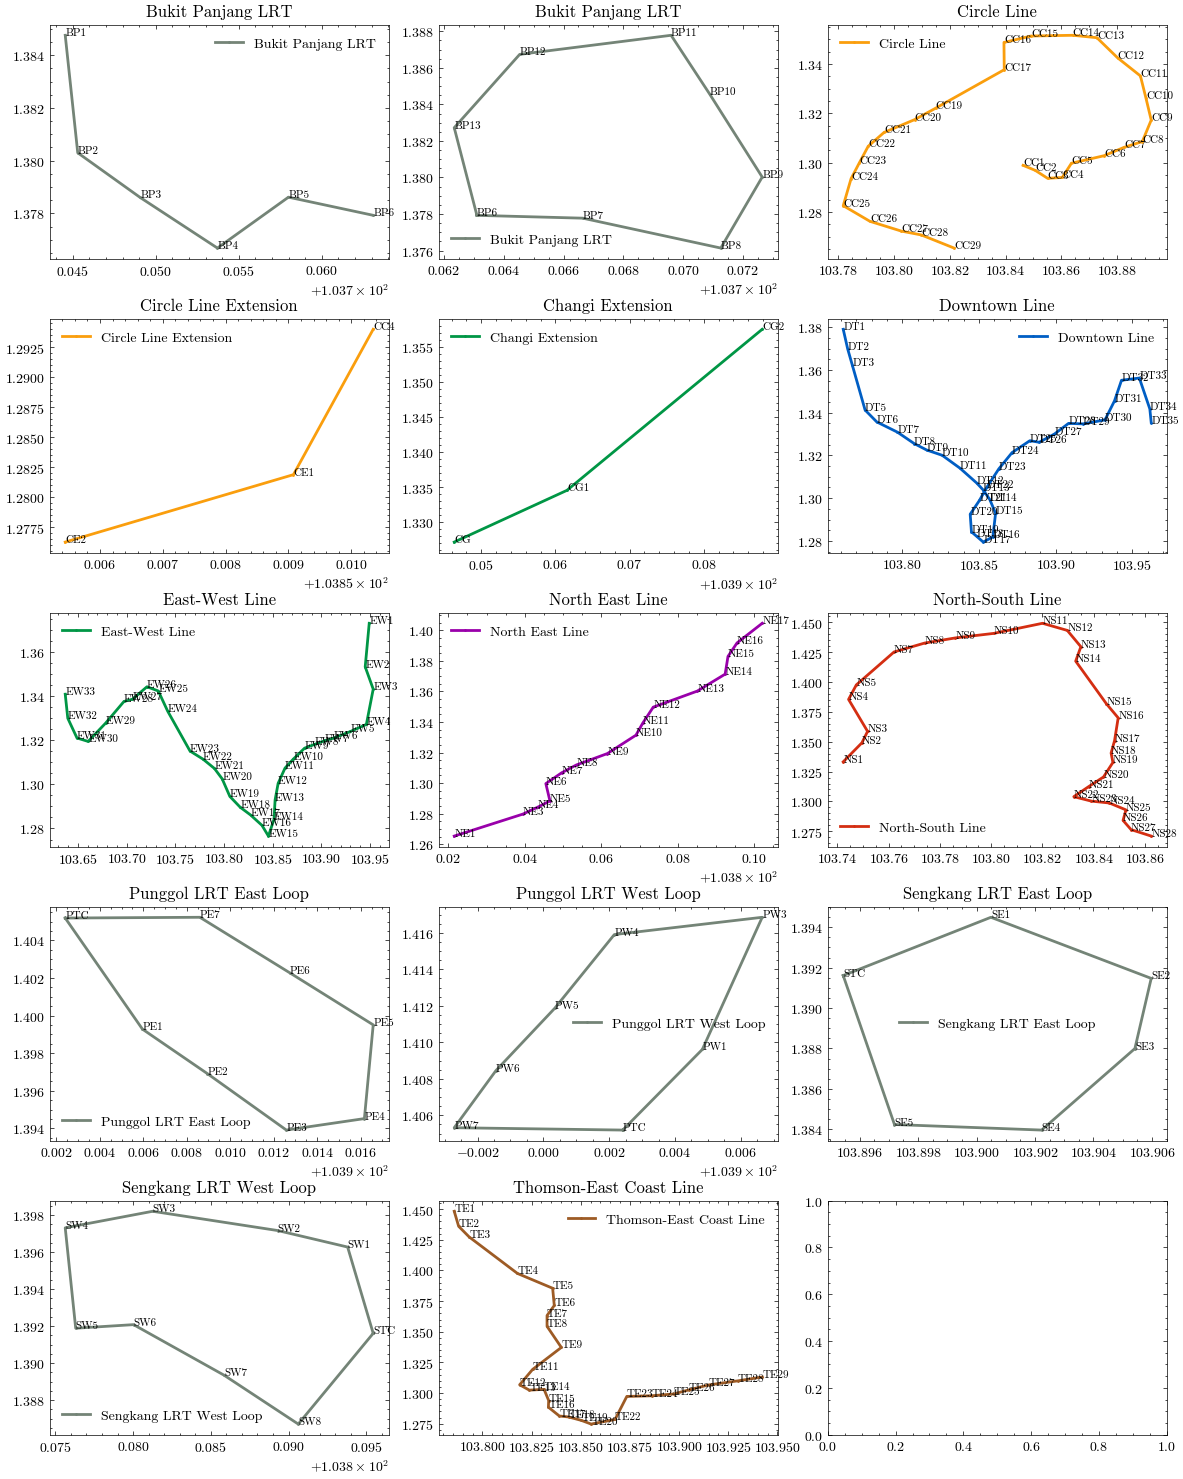

In [6]:
plot_metro_network_separate_from_dataframe(
    data, x_col='LONGITUDE', y_col='LATITUDE',
    mline_id_col = 'sheet_name',
    mline_color_col = 'line_color',
    mline_cycle_col = 'line_cycle',
    mline_label_col = 'line_name',
    node_label_col = 'station_code',
    shared_axis = False, 
    plot_background = False,
    line_kwargs={'lw': 2, 'markersize': 1})